# How Does a Bike-Share Navigate Speedy Success?

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.
Ask
Three questions will guide the future marketing program:
* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?


### Step 1: Install libraries

In [87]:
#pip install pandas

In [88]:
#pip install numpy

In [89]:
#pip install seaborn

### Step 2: Import libraries needed

In [92]:
import os, glob
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Step 3: Merge all files
This is done because we have data distributed in multiple .csv files.

*Data made available by Motivate International Inc*

In [93]:
path = f'{pathlib.Path().absolute()}\data sources'

all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NaN,NaN,NaN,NaN,41.900000,-87.630000,41.890000,-87.610000,casual
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NaN,NaN,NaN,NaN,41.880000,-87.620000,41.790000,-87.580000,casual
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.920000,-87.700000,casual
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.690000,casual
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,NaN,NaN,NaN,NaN,41.940000,-87.690000,41.940000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757546,C5A123D7BF8D350A,electric_bike,2022-04-22 15:54:11,2022-04-22 16:20:59,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.892296,-87.612198,41.910475,-87.696894,member
5757547,F7FCC7C26D8D137D,electric_bike,2022-04-21 20:18:17,2022-04-21 20:46:45,Streeter Dr & Grand Ave,13022,California Ave & North Ave,13258,41.892295,-87.612323,41.910475,-87.696894,member
5757548,43D351300A40000A,classic_bike,2022-04-21 16:46:02,2022-04-21 17:15:05,Franklin St & Monroe St,TA1309000007,St. Clair St & Erie St,13016,41.880317,-87.635185,41.894345,-87.622798,member
5757549,1618BFEEA7B566EF,electric_bike,2022-04-16 13:19:44,2022-04-16 13:37:31,Ashland Ave & Blackhawk St,13224,Southport Ave & Waveland Ave,13235,41.907094,-87.667217,41.948150,-87.663940,casual


### Step 4: Clean and prepare data

This is to give format to relevant fields and perform some data processing.

In [94]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757551 entries, 0 to 5757550
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 571.0+ MB


In [95]:
#Convert object to date fields

df_merged['started_at'] = pd.to_datetime(df_merged['started_at'])
df_merged['ended_at'] = pd.to_datetime(df_merged['ended_at'])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757551 entries, 0 to 5757550
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 571.0+ MB


In [96]:
#Calculate length of ride and the day of the week in which the service was requested
df_merged['ride_length'] = df_merged['ended_at'] - df_merged['started_at']
df_merged['ride_length'] = (df_merged['ride_length'] / np.timedelta64(1, 's')) / 3600
df_merged['day_of_week'] = df_merged['started_at'].dt.day_name()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757551 entries, 0 to 5757550
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
 14  day_of_week         object        
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 658.9+ MB


In [97]:
df_merged.sort_values(by = 'ride_length', ascending =False).head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
1127316,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,41.886024,-87.624117,41.877618,-87.673895,casual,932.402500,Saturday
1077109,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,928.194722,Friday
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,898.693333,Sunday
613346,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,878.356389,Saturday
1901574,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,818.452500,Thursday


Let us evaluate how many null values we have:

In [98]:
cols = df_merged.columns.values.tolist()
cols_to_drop = []
for col in cols:
    total_nulls = df_merged[col].isna().sum()
    if total_nulls > 0:
        cols_to_drop.append(col)
    print(f'Column {col} has {total_nulls} null values in total. This represents {round(total_nulls/df_merged.shape[0],2)} of rate')

Column ride_id has 0 null values in total. This represents 0.0 of rate
Column rideable_type has 0 null values in total. This represents 0.0 of rate
Column started_at has 0 null values in total. This represents 0.0 of rate
Column ended_at has 0 null values in total. This represents 0.0 of rate
Column start_station_name has 790207 null values in total. This represents 0.14 of rate
Column start_station_id has 790204 null values in total. This represents 0.14 of rate
Column end_station_name has 843361 null values in total. This represents 0.15 of rate
Column end_station_id has 843361 null values in total. This represents 0.15 of rate
Column start_lat has 0 null values in total. This represents 0.0 of rate
Column start_lng has 0 null values in total. This represents 0.0 of rate
Column end_lat has 4766 null values in total. This represents 0.0 of rate
Column end_lng has 4766 null values in total. This represents 0.0 of rate
Column member_casual has 0 null values in total. This represents 0.0

In [99]:
cols_to_drop

['start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'end_lat',
 'end_lng']

As per what can be seen in the null values list, the following columns have between 14% and 15% of null values:

* start station name
* start_station_id
* end_station_name
* end_station_id

Given that we are not going to use these columns in our analysis, we are just going to drop them from our data. In addition, we are going to drop the coord. colums

In [101]:
df_merged_cleaned = df_merged.drop(cols_to_drop + ['start_lat', 'start_lng'], axis = 'columns')
df_merged_cleaned

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week
0,C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,casual,0.206667,Sunday
1,DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,casual,0.748611,Sunday
2,0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,casual,0.020000,Sunday
3,7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,casual,0.253611,Sunday
4,853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,casual,0.114722,Sunday
...,...,...,...,...,...,...,...
5757546,C5A123D7BF8D350A,electric_bike,2022-04-22 15:54:11,2022-04-22 16:20:59,member,0.446667,Friday
5757547,F7FCC7C26D8D137D,electric_bike,2022-04-21 20:18:17,2022-04-21 20:46:45,member,0.474444,Thursday
5757548,43D351300A40000A,classic_bike,2022-04-21 16:46:02,2022-04-21 17:15:05,member,0.484167,Thursday
5757549,1618BFEEA7B566EF,electric_bike,2022-04-16 13:19:44,2022-04-16 13:37:31,casual,0.296389,Saturday


### Step 5: Analyze data

In [103]:
print(df_merged_cleaned.shape)
df_merged_cleaned.describe()

(5757551, 7)


,ride_length
count,5.757551e+06
mean,3.523051e-01
std,2.867457e+00
min,-9.672222e-01
25%,1.075000e-01
50%,1.919444e-01
75%,3.491667e-01
max,9.324025e+02


#### Member casual observations

Evaluate comparison on how many rides are required on casual vs member riders.

<AxesSubplot:xlabel='member_casual', ylabel='count'>

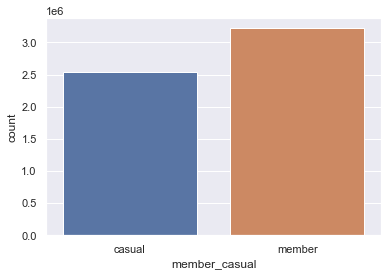

In [104]:
sns.countplot(x = 'member_casual', data = df_merged_cleaned)

In [105]:
df_merged_cleaned['member_casual'].value_counts(normalize=True)

member    0.559473
casual    0.440527
Name: member_casual, dtype: float64

Based on **how many rides are required**, the member and casual rider requests seems to be balanced. Now, let us Evaluate the **total length of the rides** requested by casual vs member riders.

In [106]:
df_grp_member_casual = df_merged_cleaned.groupby(['member_casual'])['ride_length'].sum()
df_grp_member_casual = df_grp_member_casual.reset_index(name='total_ride_length')
df_grp_member_casual

,member_casual,total_ride_length
0,casual,1.322743e+06
1,member,7.056711e+05


<AxesSubplot:xlabel='member_casual', ylabel='total_ride_length'>

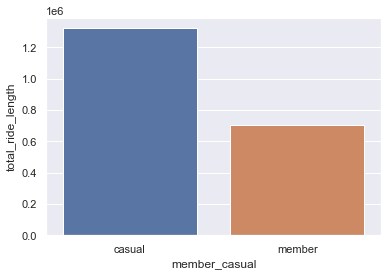

In [108]:
sns.barplot(x = 'member_casual', y = 'total_ride_length', data = df_grp_member_casual)

In [107]:
df_merged_cleaned.groupby(['member_casual'])['ride_length'].mean()

member_casual
casual    0.521513
member    0.219071
Name: ride_length, dtype: float64

<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

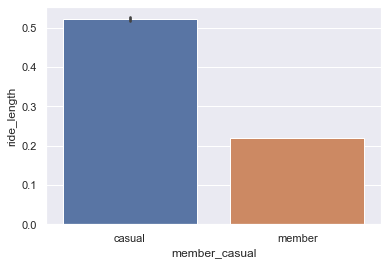

In [115]:
sns.barplot(x = 'member_casual', y = 'ride_length', data = df_merged_cleaned)  

Interestingly, **the ride length is higher for casual riders than member riders**. This is regardless the number of requests are kind of balanced. That can be seen also in the average of casual vs member ride lengths: **Casual riders spend 0.5 hrs in average ride length whereas members spend only 0.2 hrs.** Let us deep dive a bit more on casual riders.


In [114]:
df_casual_only.describe()

,ride_length
count,2.536358e+06
mean,5.215129e-01
std,4.284026e+00
min,-9.672222e-01
25%,1.472222e-01
50%,2.594444e-01
75%,4.747222e-01
max,9.324025e+02


In [113]:
df_merged_cleaned.groupby(['member_casual', 'rideable_type'])['ride_length'].sum().to_frame()

ride_length
member_casual rideable_type               
casual        classic_bike   593255.227778
              docked_bike    404098.368056
              electric_bike  325389.763889
member        classic_bike   452600.813333
              electric_bike  253070.276111

In [109]:
df_casual_only = df_merged_cleaned[df_merged_cleaned['member_casual']== 'casual']
df_casual_only_rates = df_casual_only['rideable_type'].value_counts(normalize=True).reset_index()
df_casual_only_rates.columns = ['rideable_type', 'rate']
df_casual_only_rates

,rideable_type,rate
0,classic_bike,0.486686
1,electric_bike,0.398428
2,docked_bike,0.114886


([<matplotlib.patches.Wedge at 0x248098cc430>,
 [Text(0.0459963936016839, 1.0990379118918687, 'classic_bike'),
  Text(-0.43114562332816436, -1.0119849067476099, 'electric_bike'),
  Text(1.02912811142566, -0.3884524813583438, 'docked_bike')],
 [Text(0.025088941964554853, 0.599475224668292, '49%'),
  Text(-0.23517033999718054, -0.551991767316878, '40%'),
  Text(0.5613426062321781, -0.2118831716500057, '11%')])

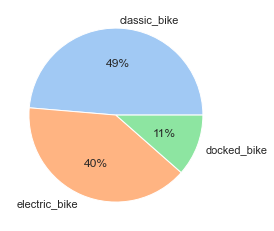

In [110]:
colors = sns.color_palette('pastel')[0:3]
plt.pie(df_casual_only_rates['rate'], labels = df_casual_only_rates['rideable_type'], colors = colors, autopct='%.0f%%')


This is such an interesting finding: **Docked bikes are used only for casual riders, not for member ones**. Actually, **Docked bikes represent 11% of the total requests**. However, **classic bikes represent the biggest portion of requests (48%).** the Let us see how this behaves including days of the week.

In [111]:
df_casual_only_dow = df_casual_only.groupby(['member_casual', 'rideable_type','day_of_week'])['ride_length'].sum().reset_index().sort_values(by = ['rideable_type','ride_length'], ascending =False)
df_casual_only_dow

,member_casual,rideable_type,day_of_week,ride_length
16,casual,electric_bike,Saturday,66402.540278
17,casual,electric_bike,Sunday,60384.319722
14,casual,electric_bike,Friday,45732.013333
15,casual,electric_bike,Monday,39903.793889
18,casual,electric_bike,Thursday,38585.683333
20,casual,electric_bike,Wednesday,37575.518611
19,casual,electric_bike,Tuesday,36805.894722
9,casual,docked_bike,Saturday,100713.981667
10,casual,docked_bike,Sunday,99654.928889
7,casual,docked_bike,Friday,51839.787222


<AxesSubplot:xlabel='day_of_week', ylabel='ride_length'>

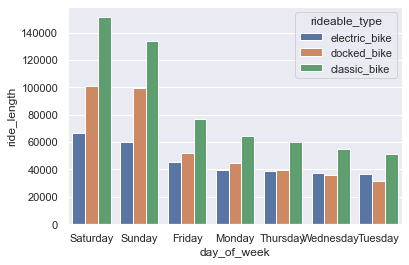

In [112]:
sns.barplot(x = 'day_of_week', y = 'ride_length' , data = df_casual_only_dow, hue = 'rideable_type')

This plot confirms the same of the pie plot: **Classic Bikes are the most required ones**. Furthermore, we can see that **Weekends are the days in which people use more the service.**

# Conclusions:

#### How do annual members and casual riders use Cyclistic bikes differently?

Based on what is portrayed above, the number of requests by member and casual riders is kind of balanced. (55% of member riders vs 44% casual riders). However, there is more length in ride from Casual riders.

#### Why would casual riders buy Cyclistic annual memberships?

As the data tells us, the length in ride comes more from casual riders. They would have more benefits using the membership instead of paying per use.

#### How can Cyclistic use digital media to influence casual riders to become members?

* Considering weekends are the busiest days with requests, digital media can be released on a weekly basis (weekends).
* The average use time of the service by casual users was half an hour. This might mean (we might need more data and knowledge of the places users are visiting) that users ride for either to buy food, supplies or some other stuff or because they just want to do some exercise. Keeping in mind those things would help the business use digital media to share a message that makes users think about their health or the fact that it is easier and healthier to use a bicycle for picking up stuff, visiting new places, etc.  